In [40]:
# Importing the pandas library
import pandas as pd

# Reading the 'crop_recommendation.csv' file into a DataFrame named 'crops'
crops = pd.read_csv('crop_recommendation.csv')

# Display the 'crops' DataFrame
print(crops)

# Updating the 'humidity' column by dividing its values by 10
crops["humidity"] = crops["humidity"] / 10

        N   P   K  temperature   humidity        ph    rainfall   label  num
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice    1
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice    1
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice    1
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice    1
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice    1
...   ...  ..  ..          ...        ...       ...         ...     ...  ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   22

[2200 rows x 9 columns]


In [41]:
corr_matrix=crops.drop(['label'],axis=1).corr()

In [42]:
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall,num
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.282787
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.167951
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.143703
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.180571
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.524452
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.052389
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.121486
num,0.282787,-0.167951,0.143703,0.180571,0.524452,0.052389,0.121486,1.000000


In [43]:
corr_matrix["num"].sort_values(ascending=False)

num            1.000000
humidity       0.524452
N              0.282787
temperature    0.180571
K              0.143703
rainfall       0.121486
ph             0.052389
P             -0.167951
Name: num, dtype: float64

array([[<Axes: xlabel='N', ylabel='N'>, <Axes: xlabel='P', ylabel='N'>,
        <Axes: xlabel='K', ylabel='N'>,
        <Axes: xlabel='temperature', ylabel='N'>,
        <Axes: xlabel='humidity', ylabel='N'>,
        <Axes: xlabel='ph', ylabel='N'>,
        <Axes: xlabel='rainfall', ylabel='N'>,
        <Axes: xlabel='num', ylabel='N'>],
       [<Axes: xlabel='N', ylabel='P'>, <Axes: xlabel='P', ylabel='P'>,
        <Axes: xlabel='K', ylabel='P'>,
        <Axes: xlabel='temperature', ylabel='P'>,
        <Axes: xlabel='humidity', ylabel='P'>,
        <Axes: xlabel='ph', ylabel='P'>,
        <Axes: xlabel='rainfall', ylabel='P'>,
        <Axes: xlabel='num', ylabel='P'>],
       [<Axes: xlabel='N', ylabel='K'>, <Axes: xlabel='P', ylabel='K'>,
        <Axes: xlabel='K', ylabel='K'>,
        <Axes: xlabel='temperature', ylabel='K'>,
        <Axes: xlabel='humidity', ylabel='K'>,
        <Axes: xlabel='ph', ylabel='K'>,
        <Axes: xlabel='rainfall', ylabel='K'>,
        <Axes: xlabel='

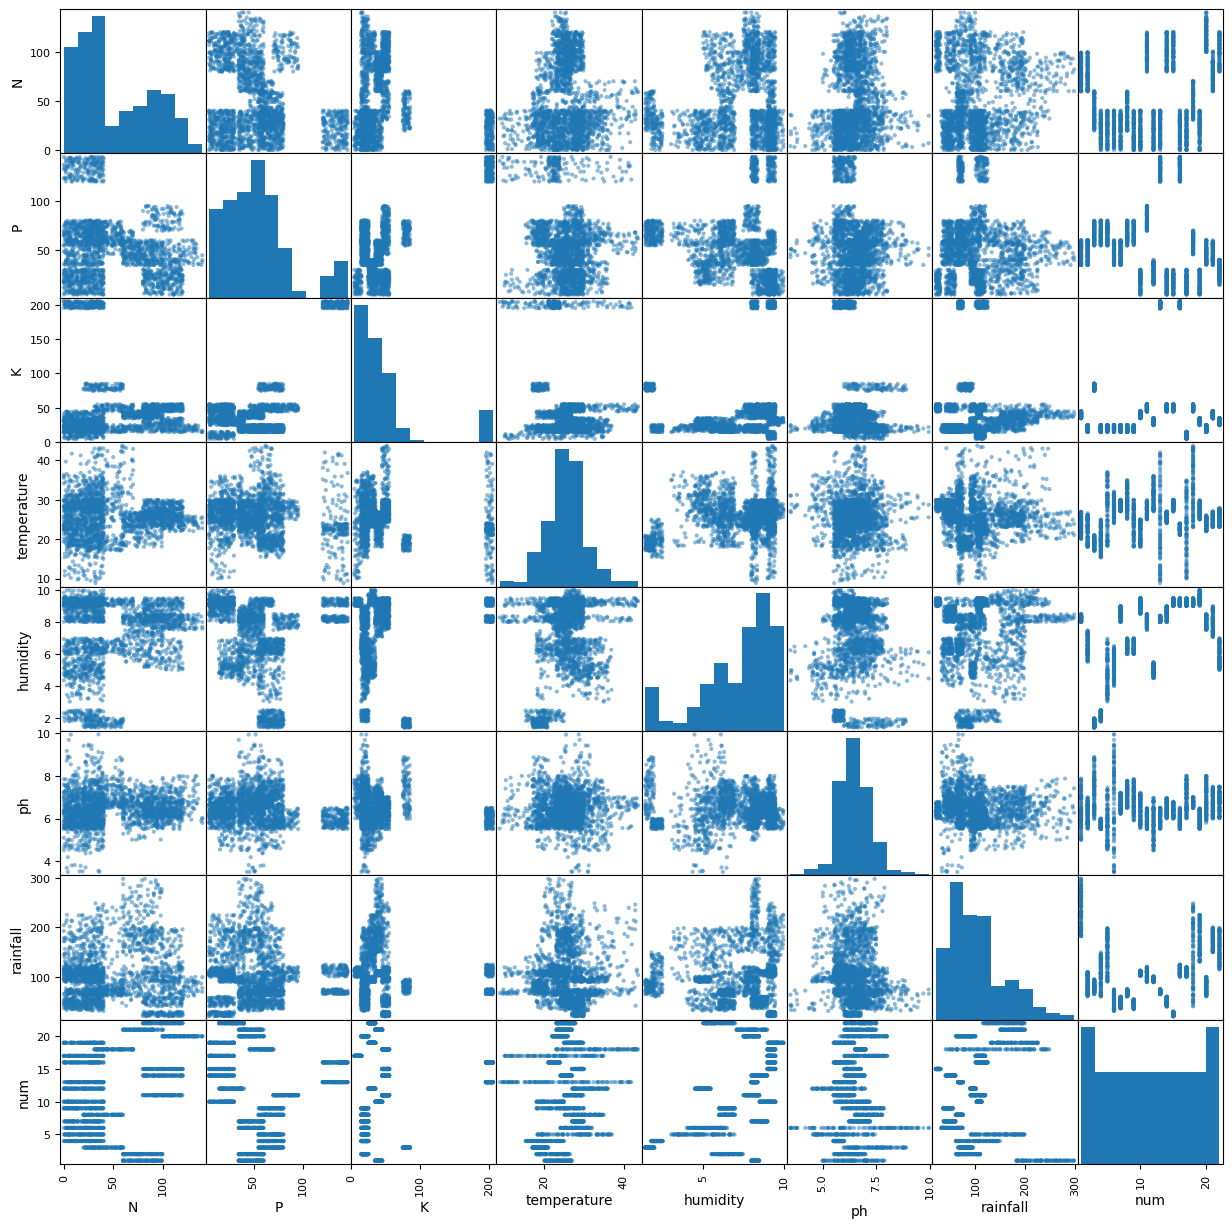

In [44]:
from pandas.plotting import scatter_matrix
# Specified attributes from the 'crops' DataFrame
attributes=["N","P","K","temperature","humidity","ph","rainfall","num"]
# Plotting scatter plots for pairs of attributes in a matrix format
# The resulting figure will be of size 15x15 units
scatter_matrix(crops[attributes],figsize=(15,15))

<Axes: xlabel='humidity', ylabel='num'>

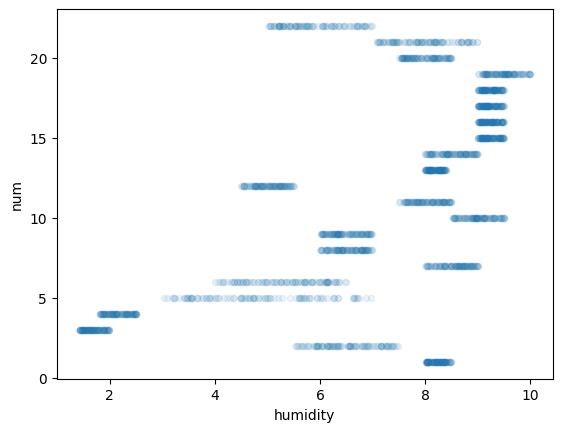

In [48]:
# Plotting a scatter plot for the 'crops' DataFrame
# 'x' represents data for the 'humidity' column on the x-axis
# 'y' represents data for the 'num' column on the y-axis
# 'alpha' is used to specify the opacity of the data points (0.08 is quite faint)
crops.plot(kind="scatter", x="humidity", y="num", alpha=0.08)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\asus\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


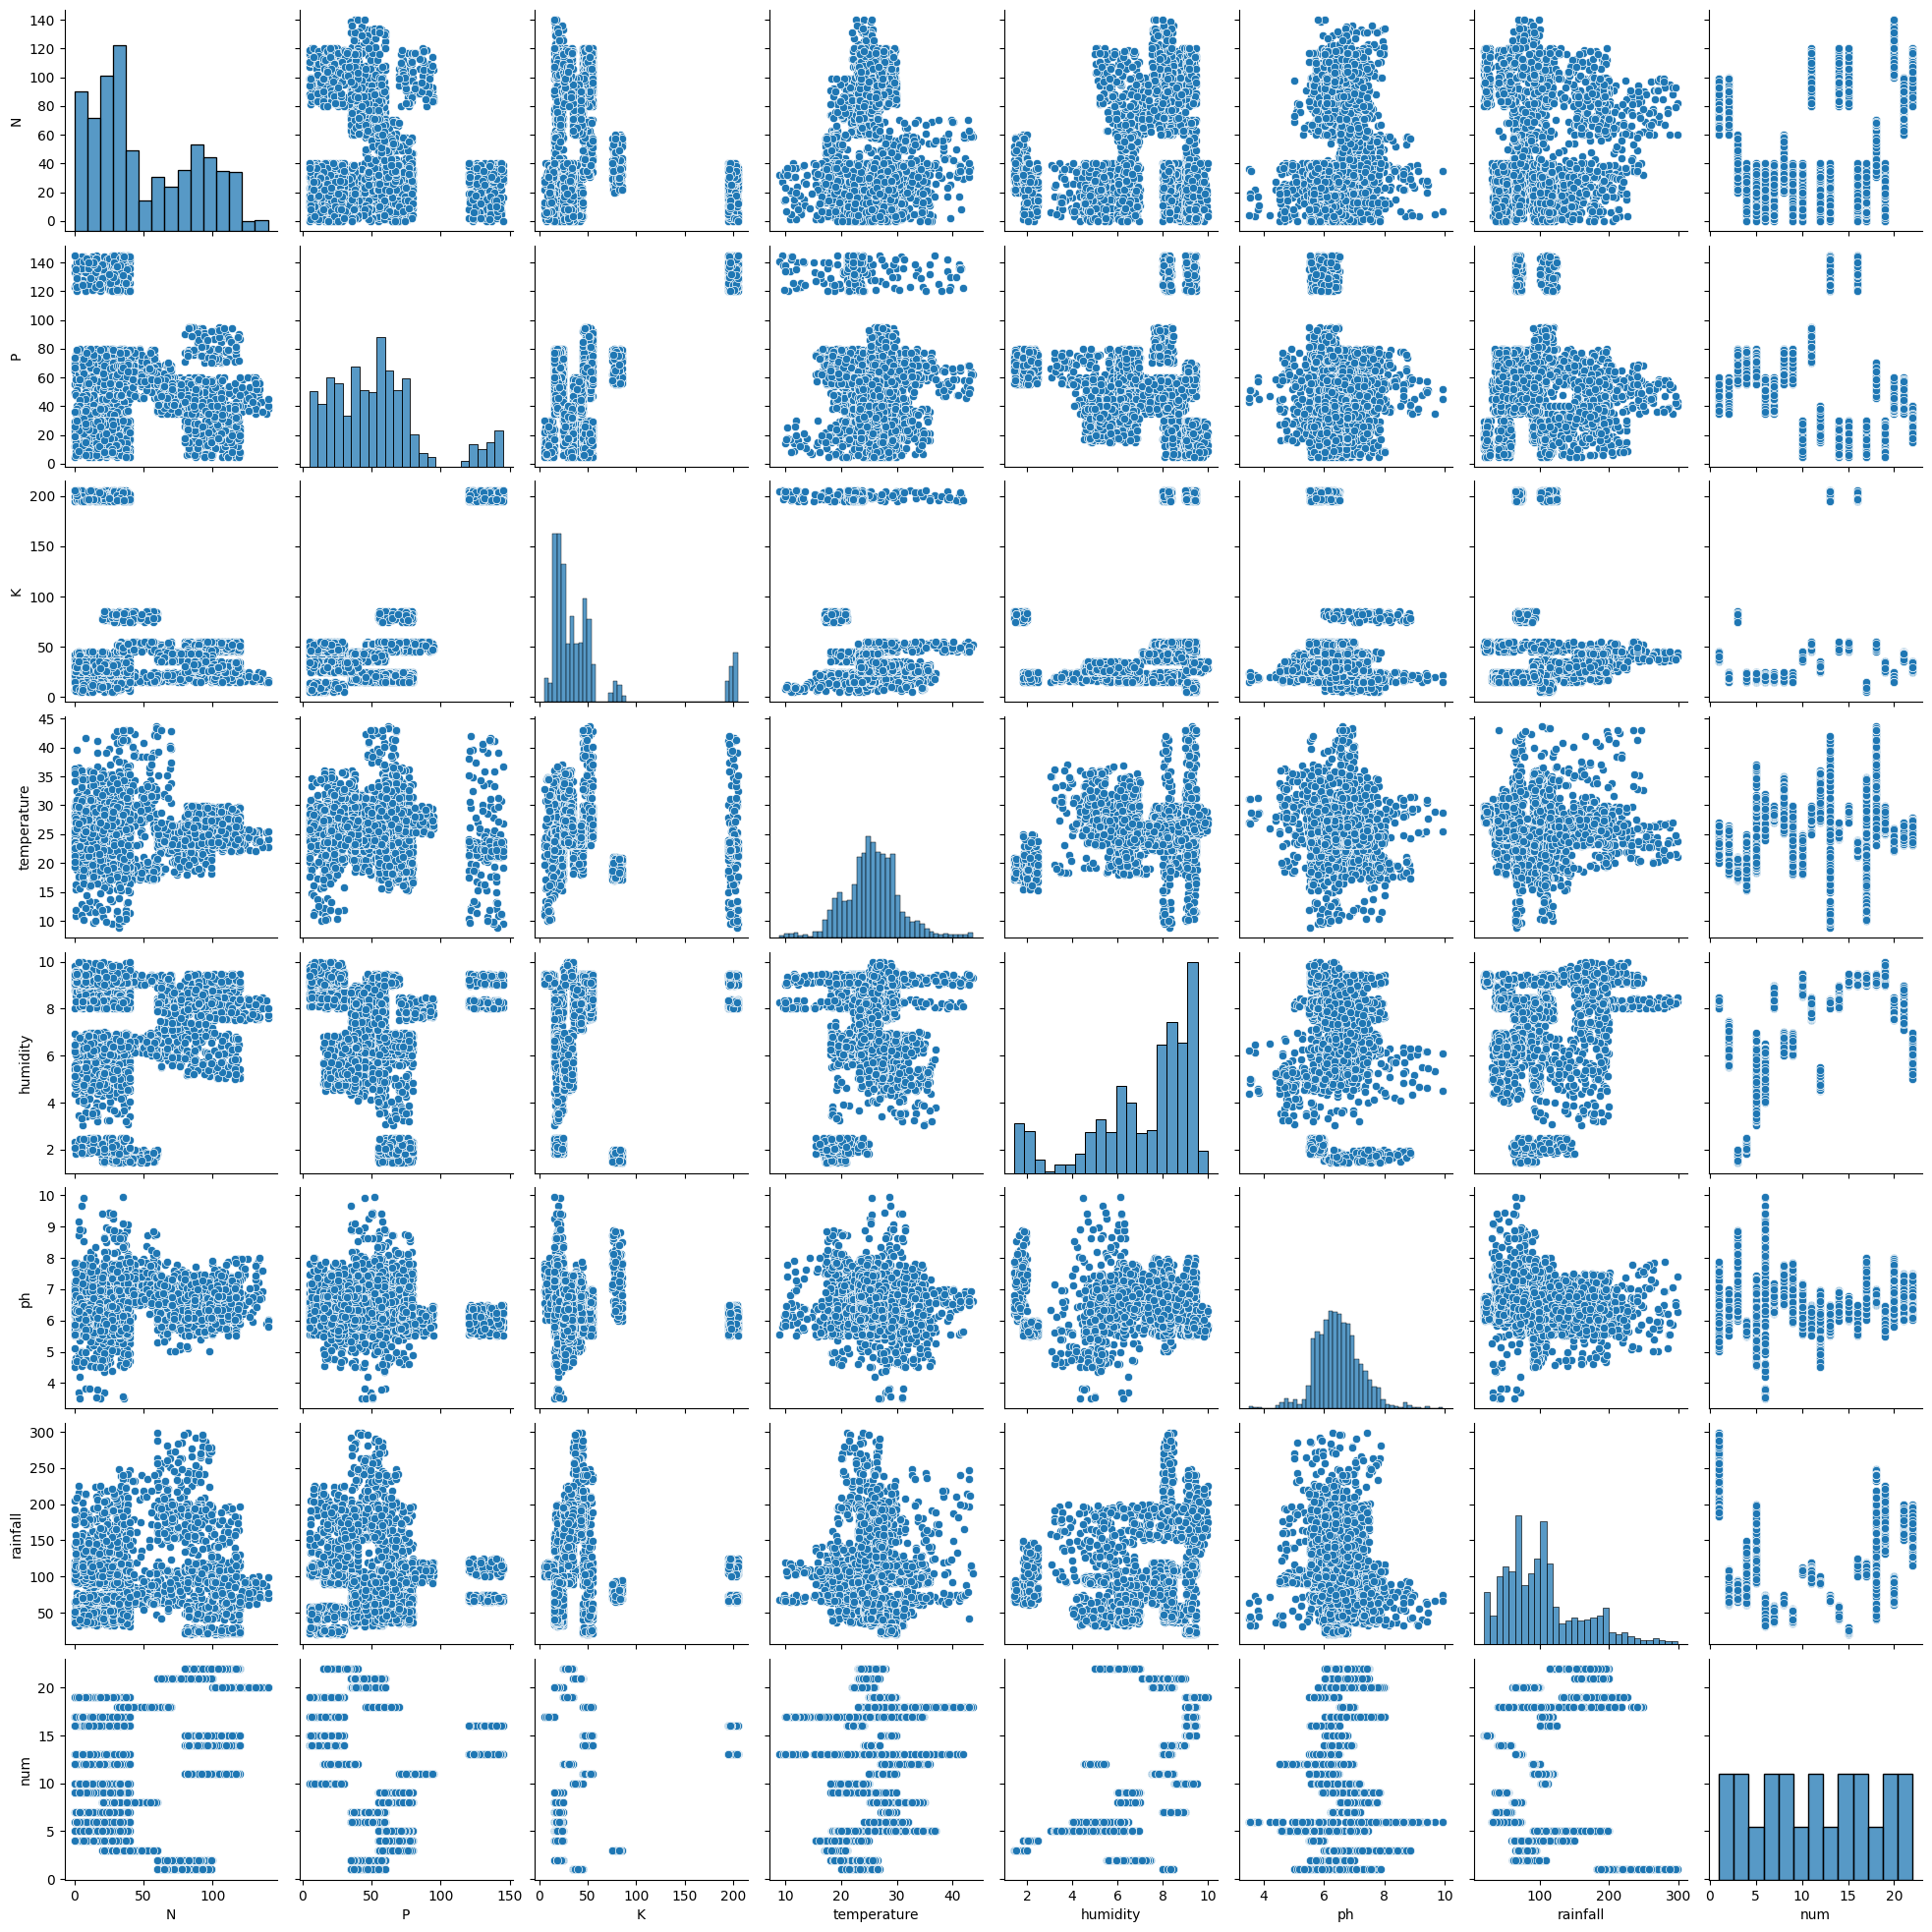

In [50]:
sns.pairplot(crops)

In [51]:
# Importing the numpy library
import numpy as np

# Creating a new column "category" in the 'crops' DataFrame
# This column will categorize values from the "humidity" column into 5 discrete intervals
# Each interval will be labeled with an integer from 1 to 5
crops["category"] = pd.cut(crops['humidity'], 5, labels=[1, 2, 3, 4, 5])

df=crops.iloc[1001]
crops.drop(index=1001, inplace=True)

In [20]:
df

N                     105
P                      95
K                      50
temperature      27.33369
humidity         8.367675
ph               5.849076
rainfall       101.049479
label              banana
num                    11
category                5
Name: 1001, dtype: object

In [21]:
crops["category"]

0       4
1       4
2       4
3       4
4       4
       ..
2195    4
2196    3
2197    4
2198    3
2199    3
Name: category, Length: 2199, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: >

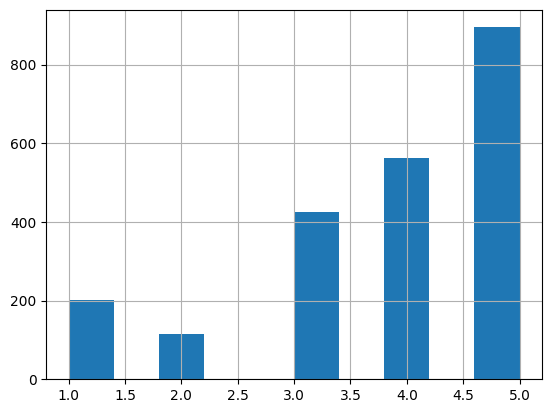

In [52]:
# Plotting a histogram for the "category" column in the 'crops' DataFrame
# This will show the distribution of data across the 5 labeled intervals
crops["category"].hist()

In [53]:
# Importing the necessary class from scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit

# Creating an instance of StratifiedShuffleSplit
# This will create a single train-test split (n_splits=1) where 20% (test_size=0.2) of the data is reserved for testing
# The random state ensures reproducibility of the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=101)

# Performing the split using the 'split' method of the StratifiedShuffleSplit instance
# The split is stratified based on the "category" column of the 'crops' DataFrame
# 'train_index' and 'test_index' are arrays of indices for the train and test sets, respectively
for train_index, test_index in split.split(crops, crops["category"]):
    # Using the indices to create the stratified train set
    strat_train_set = crops.loc[train_index]
    
    # Using the indices to create the stratified test set
    strat_test_set = crops.loc[test_index]

In [111]:
# Compute the proportion of each category in the strat_train_set
train_proportions = strat_train_set['num'].value_counts() / len(strat_train_set)

# Compute the proportion of each category in the strat_test_set
test_proportions = strat_test_set['num'].value_counts() / len(strat_test_set)

# Combine the results into a single DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Train Proportions': train_proportions,
    'Test Proportions': test_proportions
})

print(comparison_df)

     Train Proportions  Test Proportions
num                                     
1             0.045455          0.045455
2             0.043750          0.052273
3             0.044886          0.047727
4             0.046023          0.043182
5             0.046023          0.043182
6             0.046591          0.040909
7             0.049432          0.029545
8             0.046023          0.043182
9             0.044886          0.047727
10            0.045455          0.045455
11            0.047727          0.036364
12            0.044886          0.047727
13            0.044318          0.050000
14            0.044886          0.047727
15            0.044318          0.050000
16            0.045455          0.045455
17            0.043182          0.054545
18            0.044886          0.047727
19            0.046591          0.040909
20            0.042045          0.059091
21            0.046023          0.043182
22            0.047159          0.038636


In [56]:
# Calculating the proportion of each category in the 'strat_test_set'
# This is done by counting the occurrences of each category in the "category" column using 'value_counts()'
# and then dividing by the total number of rows in 'strat_test_set' using 'len()'
proportions_in_test_set = strat_test_set["category"].value_counts() / len(strat_test_set)

In [57]:
# Iterating over both the stratified training and test sets
for set_ in (strat_train_set, strat_test_set):
    # Dropping the "category" column from the current set
    # The 'axis=1' parameter indicates that we're dropping a column (not a row)
    # The 'inplace=True' parameter ensures that the operation modifies the DataFrame in place and doesn't return a new DataFrame
    set_.drop("category", axis=1, inplace=True)

<Axes: >

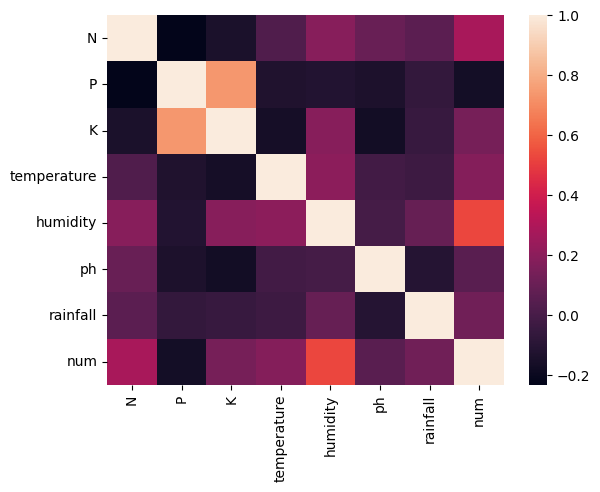

In [71]:
sns.heatmap(corr_matrix)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparing the datasets
# Dropping 'label' column as 'num' is the numerical encoding of 'label'
X_train = strat_train_set.drop(columns=['num', 'label'])
y_train = strat_train_set['num']

X_test = strat_test_set.drop(columns=['num', 'label'])
y_test = strat_test_set['num']

# Training the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=300, random_state=42)
rfc.fit(X_train, y_train)

# Making predictions using the trained model on the test dataset
y_pred = rfc.predict(X_test)

# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.90      0.92        20
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        20
          17       1.00    

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

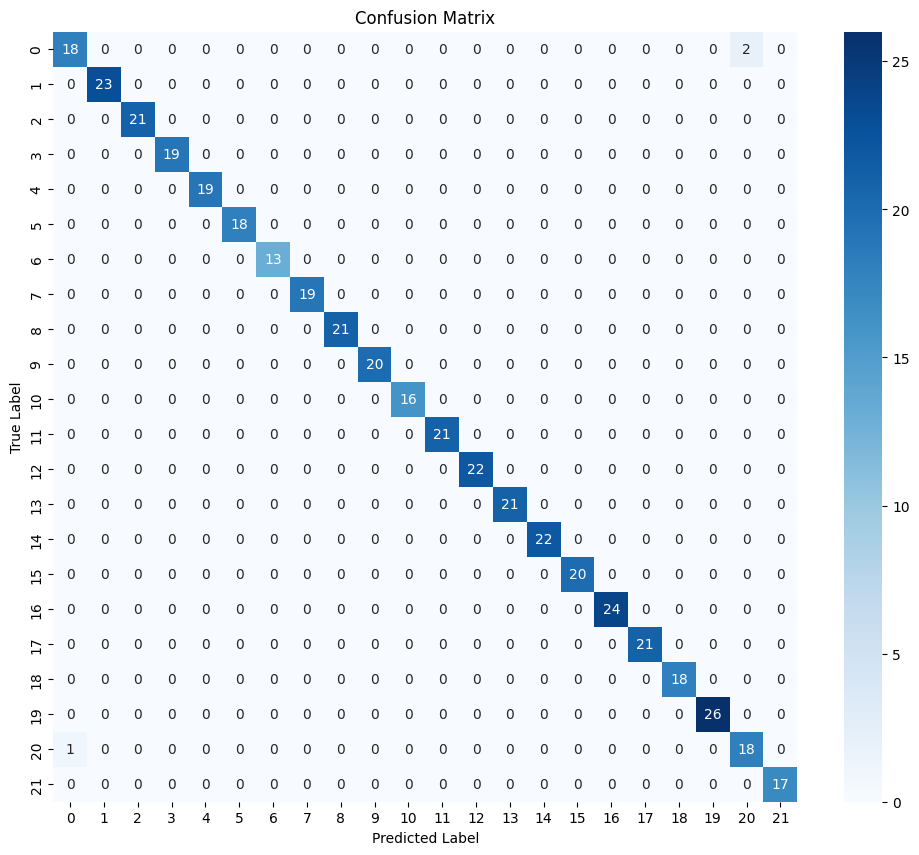

In [110]:
from sklearn.metrics import confusion_matrix
# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Visualizing the confusion matrix using Seaborn
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()